In [1]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]

In [3]:
columns = ["MJD", "log10E_GeV", "AngErr_deg", "RA_deg", "Dec_deg", "Azimuth_deg", "Zenith_deg"]
d1 = pd.read_csv("IC40_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d1.columns = columns
d2 = pd.read_csv("IC59_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d2.columns = columns
d3 = pd.read_csv("IC79_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d3.columns = columns
d4 = pd.read_csv("IC86_I_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d4.columns = columns
d5 = pd.read_csv("IC86_II_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d5.columns = columns
d6 = pd.read_csv("IC86_III_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d6.columns = columns
d7 = pd.read_csv("IC86_IV_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d7.columns = columns
d8 = pd.read_csv("IC86_V_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d8.columns = columns
d9 = pd.read_csv("IC86_VI_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d9.columns = columns
d0 = pd.read_csv("IC86_VII_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d0.columns = columns
#print(d1)

In [4]:
combined_df = pd.concat([d5, d6, d7, d8, d9, d0])
#print(combined_df)
len(combined_df)

761143

In [5]:
zen1=(d1["Zenith_deg"])
zen2=(d2["Zenith_deg"])
zen3=(d3["Zenith_deg"])
zen4=(d4["Zenith_deg"])
zen86_2to8=(combined_df["Zenith_deg"])
#print(zen86_2to8)
cos_zen1=np.cos(np.radians(zen1))
#print(cos_zen1)
cos_zen2=np.cos(np.radians(zen2))
cos_zen3=np.cos(np.radians(zen3))
cos_zen4=np.cos(np.radians(zen4))
cos_zen_comb=np.cos(np.radians(zen86_2to8))
#print(cos_zen_comb)

In [6]:
dec1=d1["Dec_deg"]
#print(dec1)
dec2=d2["Dec_deg"]
dec3=d3["Dec_deg"]
dec4=d4["Dec_deg"]
dec86_2to8=combined_df["Dec_deg"]
#print(np.sin(dec86_2to8))

In [7]:
#print(f"d1: {len(d1)}")
#print(f"d2: {len(d2)}")
#print(f"d3: {len(d3)}")
#print(f"d4: {len(d4)}")
#print(f"combined:{len(combined)}")


In [8]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)   

1134431

In [9]:
fields=[log10_E,RA,Dec,Ang_err]
#print(zenith)
iceang=fields[3]
#zenith=fields[4]
#len(zenith)

In [10]:
ice_ra_deg=(fields[1])
ice_dec_deg=(fields[2])
print(ice_ra_deg)
print(ice_dec_deg)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]


In [11]:
np.random.seed(0)
N=5000
random_ra=np.random.uniform(0,360,N)
#print(random_ra)
random_dec=np.random.uniform(np.sin(np.radians(-85)),np.sin(np.radians(85)),N)
random_dec = np.degrees(np.arcsin(random_dec))

#print(random_dec)

In [12]:

declcut = 5 
band = 5     

def angular_separation(ra1, dec1, ra2, dec2):
    delta_ra = ra1 - ra2
    return np.arccos(np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(delta_ra))

def sig(ra_rand_deg,dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang,declcut):
        decdiff=np.abs(ice_dec_deg-dec_rand_deg)
        nuind=np.nonzero(decdiff < declcut)
        sg=np.radians(iceang[nuind])**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1_rad[nuind])*np.sin(dec_rand_rad)+np.cos(ice_dec1_rad[nuind])*np.cos(dec_rand_rad)*np.cos(ice_ra1_rad[nuind]-ra_rand_rad))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
def bgs(dec_rand_deg, twopi = True):
        if twopi == True:
            s_ang = (np.sin(np.radians(dec_rand_deg + band)) - np.sin(np.radians(dec_rand_deg- band)))*(2 * np.pi)
            return 1/s_ang
        else:
            s_ang = (np.sin(np.deg2rad(dec_rand_rad + band)) - np.sin(np.deg2rad(dec_rand_rad- band)))
            return 1/s_ang

def P(x, N, S, B):
    nsN = x / N
    return nsN * S + (1 - nsN) * B

def TS(x, N, S, B):
    return 2 * np.sum(np.log(P(x, N, S, B) / B))
def ns_for_TSmax(dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang, declcut, band):
        B= bgs(dec_rand_deg, twopi = True)
        S =sig(ra_rand_deg,dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang,declcut)
        decdiff=np.abs(ice_dec_deg-dec_rand_deg)
        nuind=np.nonzero(decdiff < declcut)
        N = len(nuind[0])
        if N == 0:
            return 0, 0, 0
        nll = lambda x: -TS(x,N,S,B)
        soln = minimize(nll,6,bounds=((0,None),))
        ns = float(soln.x)
        TS_val = TS(ns, N, S, B)
        return ns,N,TS_val

ice_ra1_rad = np.radians(ice_ra_deg)
ice_dec1_rad = np.radians(ice_dec_deg)

Ts_values = []
sqrt_TS = []
Background = []

for i in range(5000):
    ra_rand_deg = random_ra[i]
    dec_rand_deg = random_dec[i]
    ra_rand_rad = np.radians(ra_rand_deg)
    dec_rand_rad = np.radians(dec_rand_deg)
    
    ns, N, TS_value =ns_for_TSmax(dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang, declcut, band)

    B = bgs(dec_rand_deg, twopi=True)
    
    Ts_values.append(TS_value)
    sqrt_TS.append(np.sqrt(TS_value))
    Background.append(B)

    print(i, N, B, ns, TS_value, sep="|")


0|77361|0.9470173479606608|0.0|0.0
1|76172|0.9977513504041507|0.0|0.0
2|39613|1.7864177399257124|0.0|0.0
3|77272|0.9552121796284049|9.193879375077694|2.96703817309933
4|69577|1.0795655296455395|1.266420290126935|0.08816388547148578
5|90354|1.0718950491751822|0.0|0.0
6|48114|1.4414021466905378|0.0|0.0
7|52495|1.2964361679279583|0.0|0.0
8|75995|1.0174805261196307|0.0|0.0
9|76093|1.0072904742606803|0.0|0.0
10|66781|1.2614069510216863|0.0|0.0
11|81739|1.121176668396705|7.190604841733656|0.44635193716654875
12|156529|0.924465721173803|0.0|0.0
13|76111|1.0067121449670065|0.0|0.0
14|77931|0.9790171003332624|0.0|0.0
15|150067|0.9288621622961678|0.0|0.0
16|97959|1.0394337105032576|3.880427758088881|0.1198514490293993
17|76895|0.9384122017325177|0.0|0.0
18|157239|0.9132148306930546|24.09595567599661|3.703944052919004
19|55944|1.4395316016804653|12.65145861995187|1.162567529794122
20|126840|0.956645469039727|0.0|0.0
21|169706|0.9153480570513006|0.0|0.0
22|40447|1.7565605385246736|0.0|0.0
23|58106

169|126434|0.913771692043406|10.32072704188479|0.9403885376053778
170|84723|1.1022553669674129|0.0|0.0
171|75804|1.024729368503705|0.0|0.0
172|98605|1.0367714052498376|0.0|0.0
173|23019|2.760532464546235|0.0|0.0
174|44422|1.7388607408927912|0.0|0.0
175|46430|1.5185026526159342|0.0|0.0
176|127319|0.9137158266430631|16.948963941660576|2.819051654240666
177|57614|1.2023718288155298|0.0|0.0
178|77330|0.9460362169107472|0.0|0.0
179|129789|0.9519538634682035|0.0|0.0
180|52270|1.3009362849733999|0.0|0.0
181|76107|1.0061793062655682|7.701390458438897|1.7811261041669013
182|117542|0.9774597690091924|14.515130312808319|1.7733863107022312
183|67201|1.2556353105622498|0.0|0.0
184|149792|0.9291022543751988|0.0|0.0
185|166552|0.9140079879194175|22.85491030836345|3.1610066156759054
186|47762|1.4527468416614167|0.0|0.0
187|52869|1.286033788921391|4.935844979638351|0.8907246711000303
188|32696|2.2368070172509857|0.0|0.0
189|7191|6.807648952435565|1.373160608559307|0.044781248798471784
190|131365|0.9134

336|124266|0.9618870228201852|0.0|0.0
337|36052|1.9201971961692104|0.0|0.0
338|76872|1.1574363389640254|1.5866891125890308|0.03803173715796885
339|22767|2.789190088238655|0.0|0.0
340|76898|0.9367692099338214|0.0|0.0
341|87831|0.9187512746820721|0.0|0.0
342|153973|0.9131166778847998|0.4349129129855275|0.0013947439974781803
343|73705|1.0448846983068496|0.0|0.0
344|76629|0.9251563138310757|0.0|0.0
345|82951|1.1135188783878829|0.0|0.0
346|75744|1.0257596476828241|0.0|0.0
347|75667|1.1685824232946727|0.0|0.0
348|15803|3.8280503064691|3.3548987960761214|0.49232241747615524
349|52348|1.29971401912506|0.0|0.0
350|45088|1.7194522654401876|0.0|0.0
351|115648|0.9146410515386406|0.0|0.0
352|33036|2.0467630179161995|0.8213894912149976|0.04269773501038803
353|142218|0.9359906849418368|0.0|0.0
354|98750|0.9165767776210157|0.0|0.0
355|44549|1.5940039230656595|2.4119681924494523|0.2711326683639292
356|77432|0.9580620537746014|16.52329282211214|8.273458686211656
357|140507|0.9377441051345949|0.0|0.0
358

503|47578|1.459989358404591|0.1870412101604379|0.002434305812186441
504|142553|0.9356513892050546|0.0|0.0
505|117751|0.9766239497342936|0.0|0.0
506|75941|1.0200963919241548|0.0|0.0
507|92308|1.06244397080227|0.0|0.0
508|47040|1.4902336688535818|5.893399393969367|1.4802600971954694
509|71232|1.0679217134882322|2.714473610943301|0.30334351194710285
510|4874|9.346016484397138|0.0|0.0
511|150440|0.9130626744312146|25.246821452191977|3.7927514462157608
512|74763|1.0352521533852803|4.014774752015283|0.6620312951857128
513|42340|1.6859214368433517|0.008018890961912257|2.1511460391999797e-06
514|57832|1.4019970602401346|0.0|0.0
515|62216|1.1417147513270707|0.0|0.0
516|161459|0.921374519736143|0.0|0.0
517|75764|1.0255258748441178|0.0|0.0
518|147671|0.9307798435101403|0.0|0.0
519|125346|0.9595142780995494|0.0|0.0
520|102495|1.0221107705106975|9.364273006814757|0.72945199310231
521|76050|0.9995816860826401|0.0|0.0
522|31707|2.115283295197268|0.0|0.0
523|63943|1.2999774531877704|2.0220119345672947

673|157019|0.9241115879431633|0.0|0.0
674|144088|0.9130713142602754|6.742595387362611|0.3973704441422536
675|55594|1.232717862593255|12.105943682053423|5.737821774236444
676|77256|0.9445059207422036|4.932813261659661|1.3575519271941539
677|47430|1.6486205868964097|0.0|0.0
678|102609|0.9160668262044211|0.0|0.0
679|159522|0.913319979414595|3.9904531402563066|0.107051327966208
680|117420|0.9144822258942868|2.3560245472323538|0.101945124443134
681|76895|0.9381315869927795|0.0|0.0
682|36920|1.888823088038071|0.0|0.0
683|68900|1.084457590864654|0.0|0.0
684|147342|0.9130490893421397|4.959776474689873|0.22399070067357507
685|153827|0.9262491097967657|2.3842869727595373|0.04783945141731245
686|124235|0.9139164754841478|0.0|0.0
687|77392|0.9485938009566046|0.0|0.0
688|78240|1.1463774742190938|0.0|0.0
689|112301|0.9906799940155321|8.607354480664581|0.47909585187786136
690|37997|1.9809994246872584|0.0|0.0
691|23574|2.6966356999550136|1.8173164532030481|0.12531486543530063
692|96495|1.0449282424315

834|47638|1.456705179123076|0.0|0.0
835|81683|1.1215972225795852|0.0|0.0
836|77374|0.9503315155573407|0.41077526528764374|0.005161585156108733
837|76051|1.017035832870067|0.0|0.0
838|4949|9.196950150655134|0.0|0.0
839|27991|2.336349729082699|0.0|0.0
840|73219|1.0504213587032938|2.853771484997854|0.4297294117356533
841|78148|0.9707558933086416|3.3303969097374306|0.5680530626965368
842|110847|0.9946814693858633|0.0|0.0
843|77335|0.9461214076151658|0.0|0.0
844|80057|1.1316595208831601|0.38596445198116364|0.0018997843934079432
845|152518|0.9271378069155335|0.0|0.0
846|77264|0.9564223169338035|0.0955980037036774|0.0006215781350695218
847|54530|1.2493926364385746|0.0|0.0
848|5818|8.000371084428913|4.1149413108496375|0.4691512177622566
849|76888|0.9388631035583588|0.0|0.0
850|75704|0.9292380630699382|1.4733049333069799|0.13138061286547909
851|77392|0.9485946477667807|2.926203687451012|0.3955394154851579
852|78574|1.1440085181321131|0.0|0.0
853|45787|1.5418638895224013|0.0|0.0
854|48600|1.4236

995|47129|1.4846176029991924|4.610688955025521|1.0395564177570493
996|51993|1.3121608940623104|3.2385568264832094|0.5167044829047763
997|111749|0.9922755486061681|12.132757438700402|0.9330449460114424
998|130530|0.9135311614533469|8.574255952961893|0.5997647428066992
999|78121|0.963613314912137|5.792120846867072|1.292680591482485
1000|77229|0.9428574398032867|0.0|0.0
1001|78972|0.9224074497843858|9.051223866056299|2.4778506012335604
1002|116147|0.9805952160882001|1.4292131982754401|0.01209749642859582
1003|146273|0.9320963751413505|0.0|0.0
1004|40238|1.7648082551631177|0.4792792981328445|0.015444413431186604
1005|54567|1.249136910325313|5.821271277605235|1.799513886221757
1006|40248|1.7639915344104053|0.0|0.0
1007|26438|2.4388673052333996|0.0|0.0
1008|86304|1.093178184189419|0.0|0.0
1009|65518|1.277205477648862|7.015039141499582|0.4132412038685298
1010|76570|0.9260547768442556|0.0|0.0
1011|27552|2.557729640815654|0.0|0.0
1012|62259|1.324506784487481|8.238107083098194|0.7904762442415001

1160|77261|0.9558924320565587|0.0|0.0
1161|99803|1.0318836789196275|0.0|0.0
1162|37763|1.8535984707375635|0.0|0.0
1163|77033|0.9407713576948867|0.0|0.0
1164|77977|0.9616662401575699|0.0|0.0
1165|128078|0.9548149118029557|0.0|0.0
1166|55987|1.438912755730081|0.0|0.0
1167|52389|1.2990018190540615|2.2613245563449134|0.2427882758727377
1168|74723|1.175831579740019|15.884679270110679|2.716521253900983
1169|142533|0.9356814254996527|0.0|0.0
1170|24197|2.6326342461676124|0.0|0.0
1171|89105|1.0781025129771742|0.0|0.0
1172|169862|0.9156340909843417|2.8416436099162223|0.05777159535989004
1173|79146|1.138730694759374|0.0|0.0
1174|75929|0.9284823648965026|9.792900800839861|3.098145392572955
1175|121911|0.9671416262446956|13.003600681451267|1.217527436753346
1176|62245|1.1414176421389877|0.0|0.0
1177|61011|1.1567352968261293|3.1629742476544953|0.3827080283640099
1178|78095|0.9631282530888036|0.0|0.0
1179|164535|0.9137347618123023|26.22840926565183|4.764054296637925
1180|105148|1.0120722134211084|9.

1321|66582|1.2635084794100484|0.7727063232746824|0.00831409418100238
1322|47333|1.472347440249642|4.631093413131791|1.0966571681741393
1323|71044|1.2104526206855388|0.0|0.0
1324|126507|0.9573526837596076|0.0|0.0
1325|65835|1.1093505258274565|0.0|0.0
1326|98820|1.0356796281942868|2.2440628580666604|0.09769741523976302
1327|97421|1.0413259698706507|0.0|0.0
1328|47514|1.4620150352503447|0.0|0.0
1329|75194|1.0315332092359348|0.3109674702444794|0.0037027586597001387
1330|130958|0.9501385686002137|0.0|0.0
1331|76877|0.940047807608532|0.0|0.0
1332|89606|1.0755024188829463|7.894514029983609|0.805333227771484
1333|169811|0.9154124206514359|0.0|0.0
1334|63996|1.298952878484364|0.0|0.0
1335|48021|1.4447519044474155|0.0|0.0
1336|99839|1.0317696885755965|2.0298849035675177|0.045607715373668034
1337|108909|0.9153234439191212|0.0|0.0
1338|164508|0.913731267031392|0.0|0.0
1339|76213|1.0114618300813385|0.0|0.0
1340|75461|1.0283720170298725|0.0|0.0
1341|60564|1.1614135954597211|0.0|0.0
1342|77251|0.9435

1484|83625|1.109192555142098|0.0|0.0
1485|30810|2.170252182718635|0.0|0.0
1486|77797|0.9233022696570347|0.0|0.0
1487|85495|1.097661359331859|0.0|0.0
1488|42904|1.662501207684922|0.0|0.0
1489|114756|0.9838699829384159|0.0|0.0
1490|69275|1.0813914920425698|4.756077556607707|0.9679442856359932
1491|50138|1.3627944497892248|0.0|0.0
1492|76987|0.9883130027347424|2.1683486690189393|0.16392933758253297
1493|19921|3.171736146931693|0.0|0.0
1494|134431|0.9453199959204134|0.7561765203310239|0.0034957769305099945
1495|78127|0.9682814057033484|0.0|0.0
1496|13399|5.072240610721437|0.0|0.0
1497|46249|1.5260328616449172|0.8772577651860783|0.030317370772342825
1498|54152|1.4792091655400441|0.8637106305757701|0.0058322529118991495
1499|145465|0.9130566478461474|5.987298979354604|0.22078969870119527
1500|48925|1.4091508539833422|0.9899531893879654|0.05109944686951867
1501|64215|1.2956916377054872|7.193899612672354|0.6735656905319378
1502|48019|1.4446427332233531|2.197923322590765|0.20415492826949752
150

1641|16201|3.7465310609795415|0.0|0.0
1642|78191|0.9671991535775598|3.0972085347335248|0.38714985169739585
1643|145836|0.9130541435088445|17.074317901347726|1.978326363908212
1644|97261|1.0418577010456287|0.0|0.0
1645|77619|0.983833478283219|2.151506795423029|0.18507774015982367
1646|47101|1.485453475200828|2.681959910087615|0.43777245654642755
1647|72251|1.1988434389775204|1.1589889327583265|0.02314453684010362
1648|14023|4.247644784397571|0.11557744089713809|0.0007016907745330744
1649|59791|1.3651599166981625|1.385655419739416|0.017561097593001326
1650|47391|1.4708852009517834|0.22631098393209428|0.0025964539104051526
1651|49888|1.370478477331434|3.9359322159107273|0.5619984871288523
1652|56172|1.2225473194722956|0.0|0.0
1653|53162|1.2796454256664973|0.0|0.0
1654|80641|1.128114267931001|0.0|0.0
1655|76157|1.163237061418644|0.0|0.0
1656|56905|1.2132925097044844|0.0|0.0
1657|48240|1.4365076534795551|0.0|0.0
1658|159265|0.9227210589830808|16.94963073016148|1.7555003865825711
1659|110647

1805|56092|1.2236183106616403|8.153421114452557|2.2376939813159273
1806|119582|0.9724313454140998|1.593968119374298|0.01631793426428995
1807|169135|0.9148224230137388|0.0|0.0
1808|27297|2.580128398541719|0.0|0.0
1809|51074|1.3350847296825077|0.0|0.0
1810|168926|0.9147642812905026|0.01801016277152561|3.4317798412877116e-07
1811|77422|0.9849754093548816|2.405736588349175|0.205005219365033
1812|141134|0.9369704076462692|0.0|0.0
1813|63236|1.1321092639123473|3.8419833950558813|0.4668507253285022
1814|45055|1.7203980863193988|0.0|0.0
1815|83550|0.9201140318210212|0.3928772770785437|0.005722752801120303
1816|80350|0.921604017453419|3.8199358972939588|0.4374190234391492
1817|83284|1.1116879909075301|12.506035975687082|1.615580289243938
1818|50563|1.5641158376089794|19.552472748535216|4.921831756885681
1819|141559|0.9131149084554059|4.307556848697286|0.14352328287019717
1820|87781|1.0852382410565216|0.0|0.0
1821|52526|1.2954766479579525|11.462077314508836|4.788319044294919
1822|73312|1.0496497

1964|105729|0.9156817038640434|0.0|0.0
1965|158214|0.9233950804477356|17.665609301473967|1.4559455626001954
1966|51775|1.317768773429048|0.0|0.0
1967|76825|0.9891256490252149|0.0|0.0
1968|167012|0.9180299028783976|0.33144215654211867|0.00030637090778779137
1969|75372|0.9312476006127798|0.0|0.0
1970|105211|1.011504576688299|5.409913450975576|0.24183662311715493
1971|69333|1.0809732657095017|7.9140027678163625|2.3811161886046963
1972|115973|0.9146063258585282|0.0|0.0
1973|73459|1.1878339044099415|0.0|0.0
1974|52347|1.2998243889474934|4.152042328974526|0.6591652426869898
1975|54125|1.47947482335231|11.5194047851918|0.8202549025010288
1976|90366|0.9181346868326612|0.0|0.0
1977|126207|0.9137864956081073|0.0|0.0
1978|132101|0.9484839134591037|9.834867220749548|0.8875516961977957
1979|169803|0.9162371933614458|0.0|0.0
1980|72841|1.193541170784394|0.0|0.0
1981|60067|1.1688423445730864|0.0|0.0
1982|50450|1.3516948753374065|1.9719828700065927|0.25664723647946036
1983|74765|1.035191281265515|2.06

2119|75994|1.0177386923030929|4.631338397158975|0.89750776537409
2120|30736|2.175046463651369|0.0|0.0
2121|76542|0.9270280590817885|0.0|0.0
2122|77412|0.9527516005641715|0.0|0.0
2123|72275|1.058772403723369|7.906719726545607|2.347389461420904
2124|168585|0.914574024675439|10.734256885581978|0.884795789329447
2125|76730|0.9359622000757135|7.002369697253296|2.0311159511644212
2126|36297|2.0605409431998716|0.0|0.0
2127|137891|0.9409075226014498|24.109912593544976|3.4050465065230116
2128|77405|0.951852047740135|0.0|0.0
2129|65786|1.1104519680441323|0.0|0.0
2130|121982|0.9668719010869918|0.0|0.0
2131|46759|1.668855011824981|11.535399332817759|1.0603906219532682
2132|135557|0.9438189464376906|0.0|0.0
2133|71072|1.2101066607398159|0.0|0.0
2134|115747|0.9815630315916862|0.0|0.0
2135|37336|2.010756351326149|0.0|0.0
2136|75776|0.9290644348317304|0.0|0.0
2137|87303|1.0876233391219923|1.8588835706853117|0.029370985323267054
2138|156940|0.9132020471312075|17.98011536369734|1.7923673678301342
2139|3

2281|76146|0.9978842159564358|1.9320583260986817|0.15746989956722252
2282|163129|0.9135927719002842|5.965850408048071|0.1760397295867768
2283|12744|5.344396408937677|0.0|0.0
2284|137526|0.9132330713689842|30.146299490933647|6.4539370315686
2285|34956|1.961250163503927|0.4256464613226906|0.008501072386542255
2286|40558|1.8793506778036424|0.1144598392928461|0.00014583987882526087
2287|76608|0.9900177881054811|0.1884999398731785|0.0016922233864082818
2288|28852|2.286975652807031|0.0|0.0
2289|40679|1.744925523824917|0.0|0.0
2290|57206|1.2086461842043654|4.634543193041662|0.9920423310696134
2291|132847|0.9475241539245188|15.48304054639817|1.5042448959018841
2292|77353|0.946371268365355|4.626332129495552|0.9487408466202004
2293|47597|1.6432438355519647|0.0|0.0
2294|81143|1.1251002931767742|10.387293590690922|0.988624845416415
2295|78002|0.9774444936440673|0.2829634931169637|0.0042813860142424595
2296|18311|3.668496529655933|0.0|0.0
2297|121591|0.9678546137765063|4.118519183188958|0.101299125

2441|76644|0.9357079127750085|1.1421199072048083|0.051462336793273486
2442|168738|0.9169930743648875|23.07573990734094|3.21249597760925
2443|103008|1.020364194064092|7.422812761087533|0.36986524746621424
2444|134009|0.9133689957940083|17.983553557731945|2.6532958669351077
2445|49147|1.6012326825234082|8.652778426174796|0.8452710100222741
2446|113074|0.9883143648928271|0.0|0.0
2447|77259|0.9553400197256353|0.0|0.0
2448|141332|0.9368140292739306|2.7400929992735574|0.05952319618585292
2449|98076|0.9166791972344028|0.0|0.0
2450|81491|1.1226419886645898|9.19868958620247|0.9449995181391503
2451|12060|4.750069139303286|4.47335623142561|0.8185840363471448
2452|153271|0.9266136305267617|7.1795277299170035|0.3214902646959251
2453|21816|2.906895582590541|0.0|0.0
2454|21992|3.079019376153551|3.4176845688264588|0.1965521195876181
2455|155414|0.9131519309786287|12.366388057729841|1.2547209777191313
2456|76027|1.017159597043141|0.0|0.0
2457|47933|1.446579799591482|6.021619065426292|1.2956997611303163

2591|130393|0.9508768327848381|0.0|0.0
2592|169870|0.9156125655429033|13.887922787415349|1.0787624832564189
2593|163886|0.9136693216805717|11.129093966135562|0.8671085981049445
2594|76270|0.9957946036153106|0.0|0.0
2595|92451|1.061549306721538|0.0|0.0
2596|75436|0.9314938927840447|0.0|0.0
2597|53492|1.269591606236522|0.0|0.0
2598|35045|1.9573420985259704|0.0|0.0
2599|77974|0.9615898934035012|0.0|0.0
2600|143349|0.9349735739425249|0.0|0.0
2601|67230|1.0995822076700439|0.0|0.0
2602|97116|1.0424607207253755|0.0|0.0
2603|47606|1.45781262181202|0.0|0.0
2604|117475|0.9144767958056882|0.0|0.0
2605|169865|0.9155003616539916|5.097645549909722|0.1916925693164283
2606|73471|1.1877468735848695|0.3334538612520367|0.0011094342549022133
2607|48977|1.4078949733601573|0.0|0.0
2608|6153|7.652962721082116|0.5621045674772073|0.01570036473677827
2609|169442|0.9151153969573705|0.0|0.0
2610|53466|1.2713962075091365|10.833700656414598|4.764796898302219
2611|159594|0.922508832868114|0.0|0.0
2612|25731|2.495096

2756|91239|1.067674837740507|1.9763895145045223|0.02988754994370835
2757|70003|1.0764147023685733|3.0219861183665895|0.3398719596671748
2758|57999|1.197663993538575|2.418313684704904|0.2677519258800537
2759|23630|2.89502690263268|0.0|0.0
2760|131235|0.9497631507051358|6.375931453434277|0.3070914939389645
2761|124451|0.9614802828649963|0.0|0.0
2762|58514|1.387087485517541|0.0|0.0
2763|23309|2.728121090169897|0.0|0.0
2764|76121|1.0095149339085052|0.0|0.0
2765|104508|1.0149266320952235|0.002450395341086173|1.0461495070550344e-06
2766|97299|0.9168035956802155|0.0|0.0
2767|39041|1.940341247046417|0.0|0.0
2768|93288|0.917508603200739|0.0|0.0
2769|50097|1.3644222748806407|0.0|0.0
2770|50636|1.562500035975107|0.0|0.0
2771|9816|5.475728998582621|0.0|0.0
2772|91694|1.0655819218875657|0.0|0.0
2773|12837|4.541607328635614|0.43467682892956044|0.006440181313120241
2774|107198|0.9155111962134932|0.0|0.0
2775|63750|1.1274587507788958|7.831938924784775|2.293754220508548
2776|35558|2.0935707178377|0.0|0

2921|169389|0.9150496783647171|14.849205308950651|1.1758578245431082
2922|48770|1.4142619335541138|0.0|0.0
2923|42574|1.6759432187701984|7.777482031884853|2.4529535163084586
2924|112380|0.9149599629065418|0.0|0.0
2925|77751|0.9823979077668598|0.0|0.0
2926|57753|1.4041836514204447|0.0|0.0
2927|77829|0.9817128710837345|0.0|0.0
2928|72999|1.19178345100547|0.0|0.0
2929|9602|5.5651593149826715|0.0|0.0
2930|36528|2.046876273155798|0.0|0.0
2931|34374|1.98514933167516|7.140675344471739|1.7342112414734598
2932|74675|1.035944304656165|0.0|0.0
2933|22423|2.83222984160687|0.0007664627713855672|2.689065799050508e-08
2934|32170|2.265808358926049|0.0|0.0
2935|33347|2.030693775037532|1.6963742938772202|0.16369620247023167
2936|77411|0.957402550702712|2.5099329757122493|0.1453577255199754
2937|122372|0.9659645191102822|13.760957665660195|1.0942641247650657
2938|78059|0.9765096724216024|0.3002334792421522|0.006233454867964042
2939|12093|4.740755366636067|3.1698895833949785|0.35702709788583276
2940|71389

3081|64319|1.2945494940557523|0.0|0.0
3082|23620|2.6942611741743465|0.0|0.0
3083|67029|1.258098312344533|0.0|0.0
3084|67000|1.1014949945412993|0.0|0.0
3085|135263|0.9133163868159248|11.197541884802847|1.0721150803162558
3086|100983|1.0278751491553157|0.0|0.0
3087|83851|1.1076823801732116|3.549754556824384|0.18925838889081956
3088|75381|0.9310507446188065|0.0|0.0
3089|146804|0.9130496280872555|22.05293861428109|3.3263381514113446
3090|24310|2.6192460960419996|0.0|0.0
3091|77837|0.9606107098234835|0.23642214830401587|0.002597904033393457
3092|74559|1.0375902099292713|0.0|0.0
3093|76669|0.9357703420104705|1.0326694225456143|0.04397997837364234
3094|76341|0.9946618860665472|0.0|0.0
3095|55042|1.2420312164859173|1.0197839773809152|0.05587256056527626
3096|39470|1.9230564404969637|0.0|0.0
3097|79258|0.922250149013094|0.0|0.0
3098|131311|0.9495389969262502|0.0|0.0
3099|44547|1.734714371664725|17.221059412842497|3.212875858846991
3100|159266|0.9227192111932454|0.0|0.0
3101|50096|1.364571409728

3240|95945|1.046818747220503|7.064238866272458|0.4527445191459806
3241|89933|0.918238566128475|0.0|0.0
3242|79932|0.9218504663292083|0.0|0.0
3243|115385|0.9146622158224988|0.0|0.0
3244|62710|1.3182174277444552|0.0|0.0
3245|77390|0.9487473185342113|0.0|0.0
3246|56770|1.4246558225048371|0.0|0.0
3247|29233|2.2589270668806956|0.0|0.0
3248|73370|1.0490698918308914|4.847001969980985|0.9062320240343579
3249|53502|1.4947409290513867|8.14527197889539|0.60525387961244
3250|42423|1.8027142429426595|0.0|0.0
3251|64214|1.1232216483344446|6.233083694244055|1.853344315087163
3252|66452|1.1052564588746303|1.0337369246902828|0.046687984243273625
3253|92923|1.0589679255987103|0.0|0.0
3254|77381|0.9499514857683968|0.0|0.0
3255|63747|1.1272394656469642|7.807933227245071|2.4049679717521153
3256|68552|1.0876891110650664|0.0|0.0
3257|76445|0.9916308383181259|0.0|0.0
3258|70183|1.220281867992271|0.0|0.0
3259|99164|0.9165172524084773|0.0|0.0
3260|50113|1.3641679687502943|0.0|0.0
3261|77258|0.9445107616909406|0

3403|104825|1.0133635898709137|10.022603813110237|0.6697734168714367
3404|75992|1.0030804816493555|0.0|0.0
3405|124300|0.9617865103048383|9.912129071464056|0.931672328655062
3406|163273|0.9136059223228652|5.0322475671604385|0.23149683160231982
3407|122883|0.9648379282229633|0.0|0.0
3408|76627|0.92680844295663|0.0|0.0
3409|53897|1.2598471278726113|3.1945984223512567|0.632105358939435
3410|76814|0.9245609892096831|0.0|0.0
3411|123486|0.9139753632144956|8.668411304450572|0.8146406489923035
3412|117862|0.9764130845474599|0.0|0.0
3413|76204|1.0109646094037144|1.6550801674623519|0.10661658623490096
3414|128397|0.9541060651371653|13.864192421182977|1.5786010115811757
3415|69950|1.0769495301082468|0.0|0.0
3416|89721|1.074974785330954|4.819573999553793|0.15625462268665424
3417|103728|1.0181730987925883|0.0|0.0
3418|48940|1.4089085302854263|0.0|0.0
3419|149844|0.9290162182225968|13.326285211119602|1.0472430720963135
3420|44447|1.5982897161748002|10.752541134629018|4.539449394390228
3421|27443|2.

3559|135732|0.913297888093016|11.180777550868788|1.4798511924522524
3560|168596|0.9145834236241212|0.0|0.0
3561|75194|1.0313948848241823|0.0|0.0
3562|72653|1.0557621120672256|0.0|0.0
3563|135843|0.9132936835928948|1.5587490486855395|0.01858057047754103
3564|148209|0.913050056291107|0.0|0.0
3565|76109|1.006001995481521|0.0|0.0
3566|154740|0.9255810533316082|0.0|0.0
3567|87947|1.0844178977524501|0.0|0.0
3568|113836|0.986097063386626|0.0|0.0
3569|53000|1.284006871006316|0.0|0.0
3570|129683|0.9521708060825012|9.800828771676747|0.5652374683423667
3571|8034|6.282855854688306|6.21014771206571|1.3536050782588687
3572|76371|0.9346586965223491|0.0|0.0
3573|104657|0.9158140604423834|0.0|0.0
3574|80398|1.1296869022790628|2.547240345271077|0.04238015940033784
3575|58012|1.398081411901492|2.374827245707365|0.04662121042387969
3576|104760|1.013869816255295|9.485754926699979|0.7817288467103471
3577|86503|1.0918899566804605|0.0|0.0
3578|42868|1.7889225240907891|0.0|0.0
3579|131517|0.9134821400444205|13

3718|47423|1.6487089849011303|0.0|0.0
3719|67486|1.0980237939447548|6.308183932256162|1.088225448355953
3720|111807|0.9920924163343845|1.052411876667646|0.01081523090252487
3721|48208|1.4377351765149742|0.0|0.0
3722|141445|0.9131169180802657|4.331772726984857|0.14639805177906032
3723|53226|1.277415133732684|0.0|0.0
3724|67587|1.2496564419208218|0.0|0.0
3725|140643|0.9375562571685471|0.0|0.0
3726|23086|2.948589561070219|0.0|0.0
3727|52153|1.3064078610878203|7.9333175488998995|2.0600137552346256
3728|64224|1.2956317393684695|0.0|0.0
3729|99689|1.0324599476589522|0.0|0.0
3730|76909|0.9370138544986415|0.0|0.0
3731|19197|3.2821240885387333|0.0|0.0
3732|99097|1.0345095303372187|0.0|0.0
3733|46326|1.52393794026329|0.0|0.0
3734|76784|1.1585312512770183|0.0|0.0
3735|79463|1.135724152084367|0.0|0.0
3736|66054|1.1078773228484589|2.6635410194624987|0.21491138492576095
3737|29011|2.4550705163089144|0.0|0.0
3738|81252|1.1243623328998813|4.987744668880496|0.20420962921018948
3739|144866|0.93354306565

3887|72892|1.0536535145943617|3.3893597501880515|0.5327557401343912
3888|75953|1.01948357871785|0.0|0.0
3889|117968|0.9761190214062546|11.276576019141851|1.1545740944025362
3890|126713|0.9569820731131672|4.986536299808879|0.2733088752626912
3891|60089|1.3600971782292988|2.021393369687729|0.05693117124670205
3892|75001|1.173542342327889|0.0|0.0
3893|82617|1.115897292209465|15.077449082251382|1.846836301097782
3894|151479|0.9277197655859147|0.0|0.0
3895|47397|1.470080264167328|0.244884355554677|0.002050671379442648
3896|114492|0.9845243803905056|0.0|0.0
3897|76429|0.9933369045040615|2.5291452309285076|0.2601571954297396
3898|84102|1.1062671630271248|0.0|0.0
3899|77376|0.9470677099230255|0.0|0.0
3900|51180|1.3326338756504819|0.0|0.0
3901|144576|0.933835304847175|0.0|0.0
3902|57384|1.4117377904913528|0.0|0.0
3903|58084|1.1958850238396725|0.0|0.0
3904|76033|1.0008511844602233|3.4914251811352583|0.4195998661115924
3905|74898|1.034009670362604|0.0|0.0
3906|84436|1.1042350030783359|12.71241440

4051|76510|1.1609355527415275|10.866809926719329|1.1086725071077346
4052|137969|0.9408126954639684|0.0|0.0
4053|75923|1.1653197596355083|0.0|0.0
4054|150673|0.9283482121955576|1.2640747830080017|0.01106574619911507
4055|145691|0.9326454513524799|0.3978376360818897|0.0016362147850278814
4056|52119|1.3077339478894454|0.0|0.0
4057|55299|1.4531635387497452|8.773264361605776|0.8380276234181618
4058|53868|1.2603865320747365|2.466015130374551|0.2243707380438164
4059|153238|0.9131012708026264|10.429765947751445|0.8594124218171167
4060|77921|0.9794525572685303|7.228764612448564|1.8672920639723105
4061|76113|1.006779557524505|0.0|0.0
4062|56979|1.2128301557808874|0.0|0.0
4063|168431|0.9172166941960285|11.103880710015934|0.7737595171843668
4064|67195|1.2556195374713193|3.805581567485858|0.1626905199458442
4065|144425|0.913066271153261|14.850746131416463|1.3057140699167835
4066|77411|0.9508439043359975|2.561424296164123|0.2597344593430275
4067|44448|1.7384374325968173|0.0|0.0
4068|51075|1.33493442

4214|149385|0.9294306161271078|0.0|0.0
4215|168601|0.9171179677765955|2.215760331148999|0.03802444364129881
4216|7093|6.8748637241670805|9.380322608321462|2.602692002097517
4217|87983|1.0842952976560516|5.939308628458747|0.2770406259046265
4218|52703|1.5135706467416854|0.0|0.0
4219|73350|1.0491464041718557|0.0|0.0
4220|50960|1.3375709986842466|0.0|0.0
4221|88640|1.0806303357553835|0.0|0.0
4222|101108|1.0272945346705378|11.053426662272622|0.7732445679101758
4223|81228|1.1246535951645562|0.0|0.0
4224|47085|1.657962189759161|0.0|0.0
4225|30647|2.179831650093068|0.0|0.0
4226|169899|0.9155446806366244|6.615562176042325|0.32459945632959786
4227|82435|1.1168980178294348|5.493744212068762|0.3240267925808341
4228|148814|0.913051849038953|0.0|0.0
4229|167053|0.9180164497764944|4.676230737701254|0.15241510211741724
4230|161713|0.9212007956979583|0.0|0.0
4231|14408|4.149787455650446|4.910759215366142|0.8730422154738431
4232|51456|1.540762738921819|0.0|0.0
4233|64963|1.1171637081016625|0.0|0.0
4234

4377|105007|1.0126539858894377|0.0|0.0
4378|78270|0.9666162351803048|0.0|0.0
4379|26908|2.405151753157854|0.0|0.0
4380|165733|0.9188181270964292|11.950981628919832|0.7474701080027019
4381|76230|1.0144276038608675|0.0|0.0
4382|95163|1.0502134396072855|0.0|0.0
4383|57338|1.206910629897664|6.19596051332548|1.7063003822839269
4384|67086|1.2574605780539505|0.0|0.0
4385|91032|1.068809432787936|0.0|0.0
4386|77190|0.9419650829993597|0.0|0.0
4387|57386|1.2055811156647904|0.0|0.0
4388|64472|1.2922514382262607|0.0|0.0
4389|77928|0.962159705306107|0.0|0.0
4390|47104|1.485124091223442|2.180382221886135|0.22196981831658325
4391|155955|0.9131682172270761|13.42978573162972|1.3664146161123205
4392|29045|2.2741350089512213|0.0|0.0
4393|55254|1.2387678787209406|2.402364075997695|0.2469961047957409
4394|50778|1.3409726402125406|0.0|0.0
4395|146350|0.9130510498056184|3.428997347731945|0.10753570628789072
4396|78102|0.971721778724619|0.0|0.0
4397|102796|1.0210644104333413|0.03834541621371688|8.6366726794356

4539|91719|1.0652947704709326|11.134111586980413|1.3414119541237455
4540|168347|0.9172623726622126|16.516213827306725|1.3522379991148985
4541|125365|0.959464293309927|0.0|0.0
4542|67623|1.0964841733628767|0.0|0.0
4543|47066|1.6596322803282004|0.0|0.0
4544|63261|1.3093188511574254|0.0|0.0
4545|83030|1.113226045340467|4.580734235604546|0.17636601372233535
4546|22657|2.8021805394803394|0.0|0.0
4547|61488|1.1507167742398294|0.0|0.0
4548|47766|1.637959987467247|10.670265022505644|1.5313521264582226
4549|76773|1.1587842732535425|4.073444480507837|0.20009741132045014
4550|66804|1.2609263845409027|0.0|0.0
4551|75445|0.930014402829804|2.0871557496522306|0.1657524123415407
4552|73754|1.0443270691780815|4.442839077797985|0.7088961265418442
4553|55240|1.454499437093791|0.0|0.0
4554|77269|0.9437841327032834|4.1596799141342515|1.0521926557301782
4555|76258|0.9965641403517016|2.0024533429339533|0.24227821422999415
4556|76344|0.9946908652879948|6.419406236103833|1.4003215378668656
4557|57483|1.4098294

4699|42303|1.8074585937735694|2.6840510911428836|0.07435360501305838
4700|55079|1.4568794917526806|0.0|0.0
4701|75409|1.0288377943000477|0.0|0.0
4702|68123|1.2421081954020012|6.663052184958857|0.7732102450795922
4703|92251|1.0629863584178716|0.0|0.0
4704|11939|5.683559373387711|0.0|0.0
4705|55727|1.2309584092618175|6.054598811163109|1.463591009360237
4706|53500|1.49477129318633|1.5193565231362336|0.03579343717940581
4707|35464|1.9426671870350687|3.8828968808066864|0.6550167628066804
4708|119497|0.9727033258144637|0.0|0.0
4709|120668|0.9697869124283265|0.0|0.0
4710|48123|1.62929014428665|0.0|0.0
4711|68721|1.0866220669585802|0.0|0.0
4712|57317|1.2072732111257891|1.0490474415047164|0.06630703518161096
4713|160573|0.9133801055690591|16.94202346104419|1.8772169149522702
4714|35237|2.111760021376086|0.0|0.0
4715|76041|1.0170858898302675|2.8695880894094272|0.4234671093428625
4716|79996|1.1319463157788774|0.0|0.0
4717|78029|0.9781598393461463|0.0|0.0
4718|73647|1.0459907127238377|0.0|0.0
4719

4860|41241|1.7255189745638229|0.0|0.0
4861|57364|1.4122767596808905|2.69307558941219|0.13213532287129537
4862|52933|1.2853395700565213|0.005913266681528318|7.4094573648245034e-06
4863|67490|1.2507911226058572|7.167911215983631|0.5977362953772944
4864|89806|1.0746797749465478|0.0|0.0
4865|98277|1.0380945388687952|3.081581361017756|0.07630984455679901
4866|114685|0.9840554494887063|9.737599905491294|0.6590171254927025
4867|63062|1.1336599503456477|0.0|0.0
4868|124297|0.9618161629981193|4.214765215989247|0.11961759807840805
4869|47604|1.4585953726706964|0.7686530295553582|0.029389938237481095
4870|63287|1.308863676097247|0.0|0.0
4871|62617|1.138099844933772|4.120368172659483|0.6447348012979913
4872|84594|0.9197318754656347|1.818397182015302|0.1130018952412421
4873|50999|1.5533055449824176|9.557699715521522|1.1129787461784348
4874|80445|1.129424390451624|19.13681206769244|2.506673252198091
4875|28060|2.33305333718671|1.0163159392308068|0.05044511252264511
4876|135951|0.9132885935693406|0.0

In [18]:
ts=np.array(Ts_values)
ts1=ts[ts>3.34]

print(len(ts1))

129


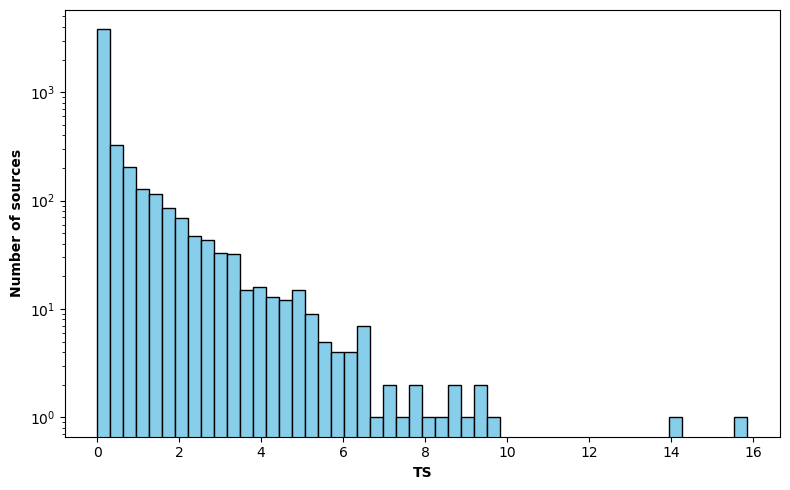

In [19]:
plt.figure(figsize=(8, 5))
plt.hist((Ts_values), bins=50,log=True, color='skyblue', edgecolor='black')
plt.xlabel('TS', fontweight='bold')
plt.ylabel('Number of sources', fontweight='bold')
plt.tight_layout()

# Save as PDF
plt.savefig("ts_histogram1_plot.pdf")
plt.show()

In [17]:
f = len(random_ra)#print(p)
binnedsts, wsts = np.histogram(sqrt_TS, 15)# Creates a histogram of `sqrt_TS` with 10 bins.

#ne01 = 20
amp  = f/13#np.sum(binnedsts)/ne01
#binnedsts = binnedsts/amp
yerr = np.sqrt(binnedsts)
b2 = binnedsts[(binnedsts>10)]# Filters bins with more than 10 events.
yerr2 = yerr[(binnedsts>10)]# Filters y-errors for bins with >10 events.
x=0.5*(wsts[1:]+ wsts[:-1])# Computes bin centers.
x2 = x[(binnedsts>10)] # Filters bin centers with >10 events.
xerr=x[0]-wsts[0]# Error in x, assumed as bin width.
mean_guess = np.mean(sqrt_TS)
sd_guess = np.std(sqrt_TS)
print(mean_guess)
print(sd_guess)

0.3246051368611866
0.5470378076926617


In [18]:
def gaussian(x,mean,sd):
    '''Returns the gaussian PDF value at for the given mean and standard deviation'''
#    mean=0.114
    A=f/13
    return A*np.exp(-(x - mean) ** 2.0 / sd ** 2.0)
loggaussian = lambda x, mean, var:  np.log(gaussian(x, mean, var))
gparam, gerr = curve_fit(gaussian, x2, b2,  p0=[0.1, 0.4],sigma=yerr2, absolute_sigma=True, maxfev = 10000, method='dogbox')
gx = np.linspace(0, wsts[-1], 100)# Creates x-values for a smooth Gaussian plot.

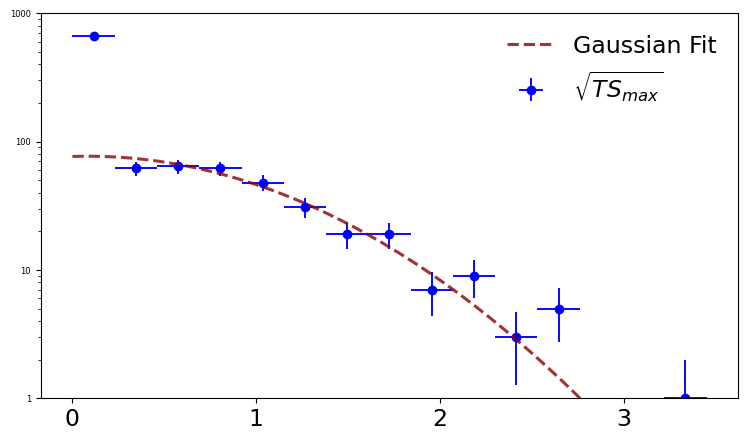

In [19]:
plt.figure(figsize=(9,5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=17)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=6)
plt.ylim(1, 1000)
plt.errorbar(x, binnedsts, xerr=xerr,yerr=yerr,  aa = True, barsabove = True, fmt='ob',ecolor='blue', elinewidth=1.35, label='$\sqrt{TS_{max}}$')
plt.plot(gx,gaussian(gx, gparam[0], gparam[1]),'--', alpha=0.8, label=f'Gaussian Fit', color='darkred', lw=2.2)

#plt.xlabel("$\mathbf{\sqrt{TS_{max}}}$", fontweight='bold', fontdict=font)
#plt.ylabel("No.of Events", fontweight='bold', fontdict=font)
#plt.grid(True, which='major')
legend =plt.legend(prop={'size':17}, framealpha=0)
legend.get_frame().set_facecolor('none')
#plt.savefig("outputs/sqrt(TSmax)final.jpg")
plt.show()

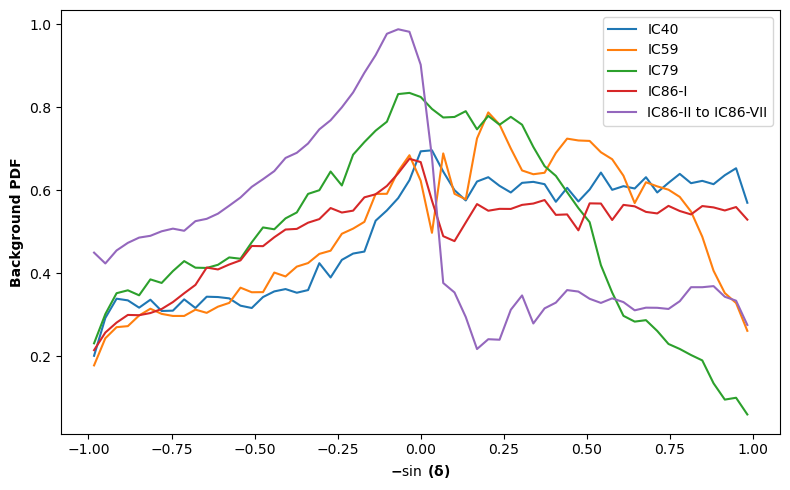

In [30]:
plt.figure(figsize=(8, 5))
labels = ["IC40", "IC59", "IC79", "IC86-I", "IC86-II to IC86-VII"]
bins1 = np.linspace(-1, 1, 60)
xcentre = 0.5 * (bins1[1:] + bins1[:-1])  # bin centres

datas2 = [d1, d2, d3, d4, pd.concat([d5, d6, d7, d8, d9, d0])]

def B_i(datasdec):
    return -np.sin(np.radians(datasdec["Dec_deg"]))

for datasdec, label in zip(datas2, labels):
    sindec = B_i(datasdec)
    hist, _ = np.histogram(sindec, bins1, density=True)
    plt.plot(xcentre, hist, label=label)


plt.xlabel(r'$\mathbf{-\sin\;(\delta)}$', fontweight='bold')

plt.ylabel("Background PDF", fontweight='bold')
plt.legend()
plt.tight_layout()  # Optional: better layout spacing

plt.savefig("bg_ic_new12.pdf")  # Save before show
plt.show()
